https://github.com/vikhyat/moondream
https://github.com/vikhyat/moondream/blob/main/notebooks/RepEng.ipynb


In [6]:
# !pip install transformers
# !pip install pyvips
# !pip install gym-pusht
# !pip install einops
# !pip install "accelerate>=0.26.0"
# !pip install matplotlib
# !python --version
# !pip install datasets
# !pip install gdown
# !pip install zarr

  Using cached pygame-2.6.1-cp310-cp310-win_amd64.whl.metadata (13 kB)
Using cached pygame-2.6.1-cp310-cp310-win_amd64.whl (10.6 MB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
  Attempting uninstall: pygame
    Found existing installation: pygame 2.1.2
    Uninstalling pygame-2.1.2:
      Successfully uninstalled pygame-2.1.2


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


Python 3.10.16


In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

# !pip uninstall pyvips
# !pip install pyvips

Looking in indexes: https://download.pytorch.org/whl/cu126


## Loading gym and model

In [2]:
import torch
print(torch.__version__)

2.6.0+cu126


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


act space Box(0.0, 512.0, (2,), float32)
Action: [155.26108   31.849497]
Robot pos: [329.04626224 320.73006824]


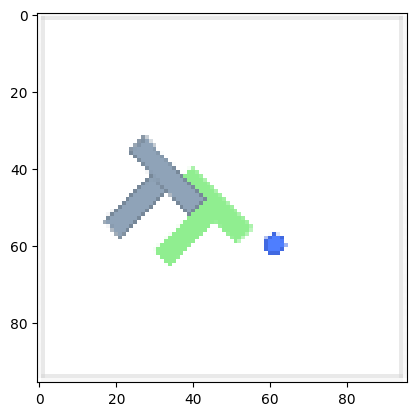

Action: [212.17412 488.33105]
Robot pos: [266.85837839 324.35253487]


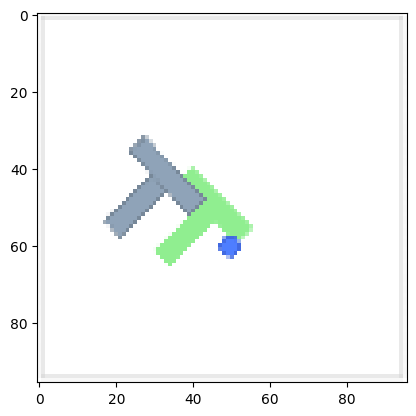

Action: [215.80989 366.55093]
Robot pos: [238.85742052 355.89987145]


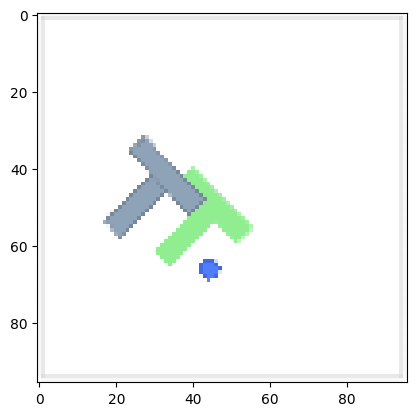

Action: [309.74457 202.8804 ]
Robot pos: [254.18444529 315.25713941]


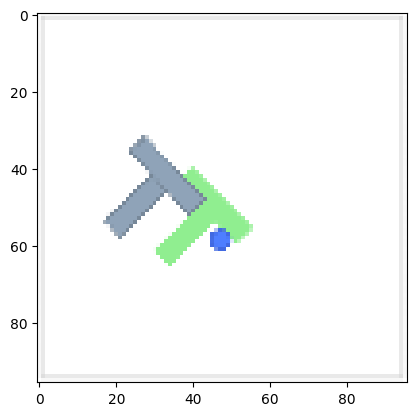

Action: [120.198784  95.85245 ]
Robot pos: [222.54416335 233.21869216]


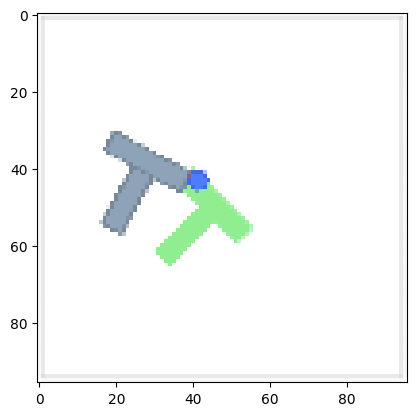

Action: [ 36.95637 324.1067 ]
Robot pos: [152.61388768 235.63323999]


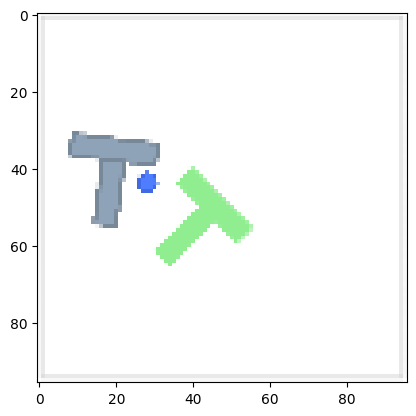

Action: [363.54993   41.432613]
Robot pos: [194.29655919 188.5523257 ]


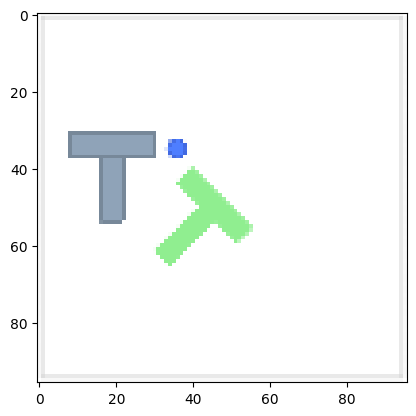

Action: [372.306   498.04785]
Robot pos: [270.68701738 258.24530986]


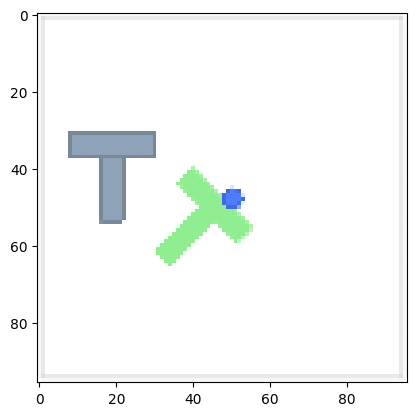

Action: [498.32864 193.24182]
Robot pos: [357.77368306 273.82870722]


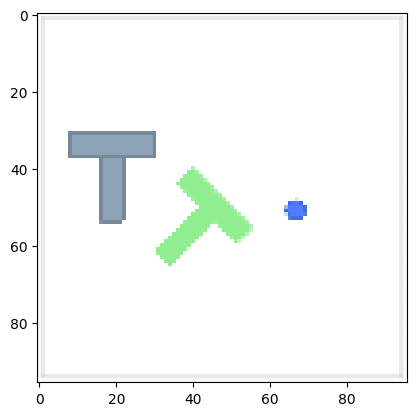

Action: [254.3799 172.4185]
Robot pos: [352.56685428 236.3368425 ]


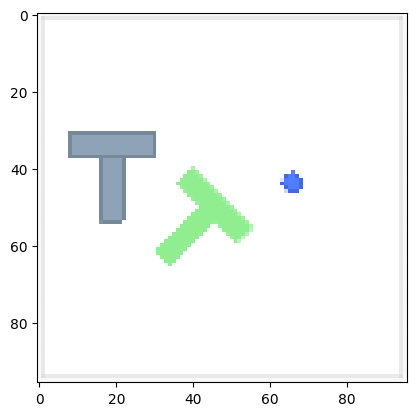

Action: [195.11269   42.787773]
Robot pos: [294.26692253 167.80219153]


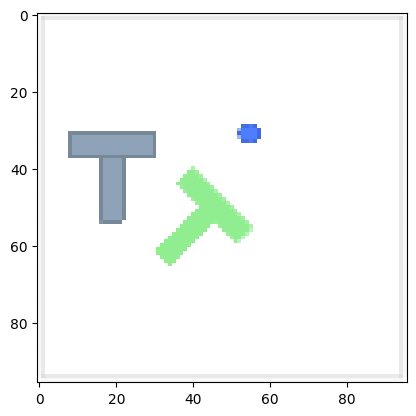

Action: [269.92706 328.49622]
Robot pos: [269.51410875 193.71357163]


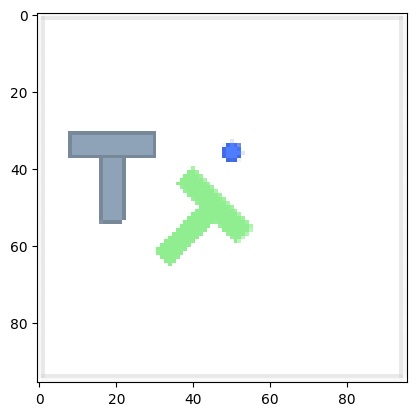

Action: [389.45425 309.24478]
Robot pos: [302.36625904 246.01042088]


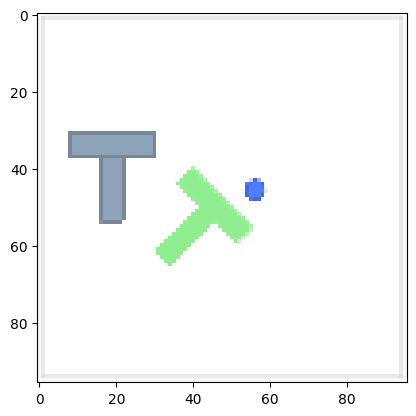

Action: [495.60037 457.0329 ]
Robot pos: [372.94923892 321.22321527]


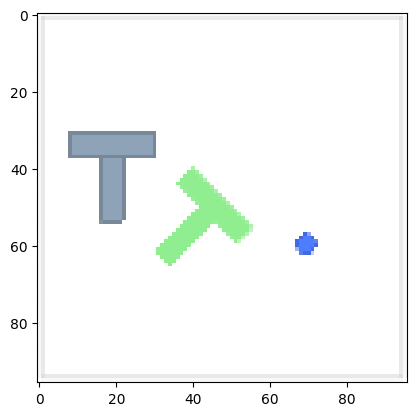

Action: [206.63513 434.19336]
Robot pos: [345.32685572 378.1735356 ]


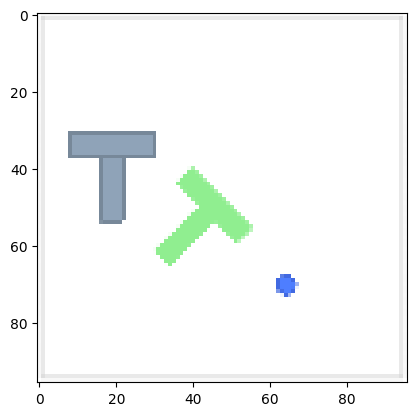

Action: [138.82077 330.09412]
Robot pos: [265.50223714 376.45494515]


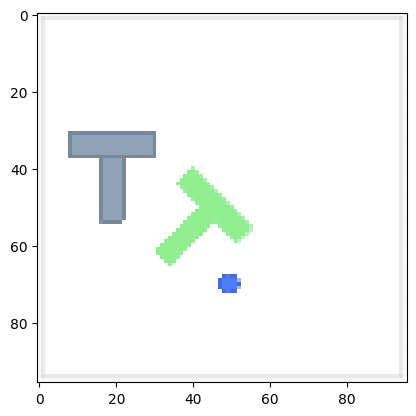

Action: [320.44373 233.7346 ]
Robot pos: [258.74340404 328.79030707]


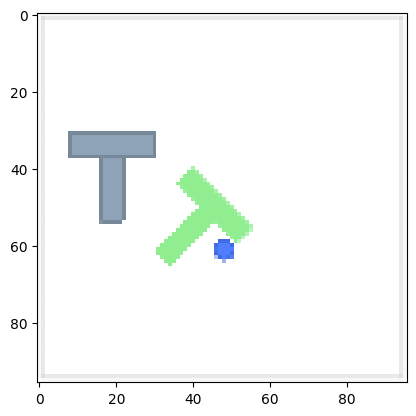

Action: [201.86082 256.58237]
Robot pos: [248.22840858 291.49313998]


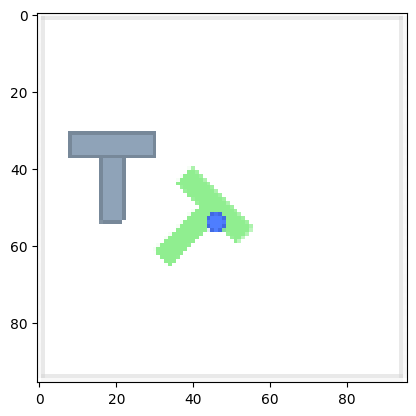

Action: [379.80414 455.99185]
Robot pos: [280.72010327 332.14875237]


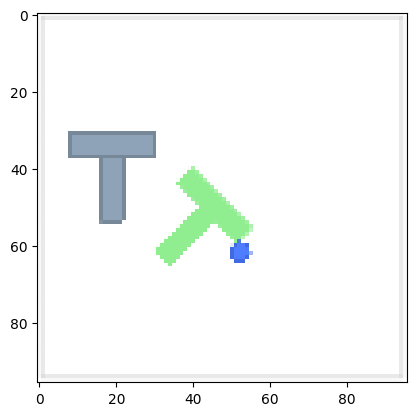

Action: [372.73376 500.62338]
Robot pos: [322.70301474 400.43632296]


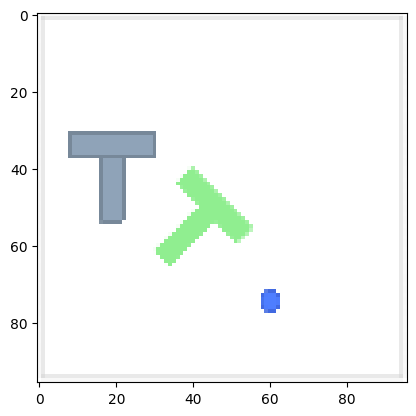

Action: [172.39561 420.1868 ]
Robot pos: [288.46906705 425.02226576]


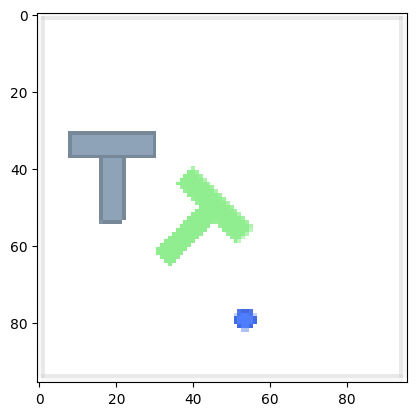

Action: [224.31053 270.87036]
Robot pos: [252.59951231 381.53290441]


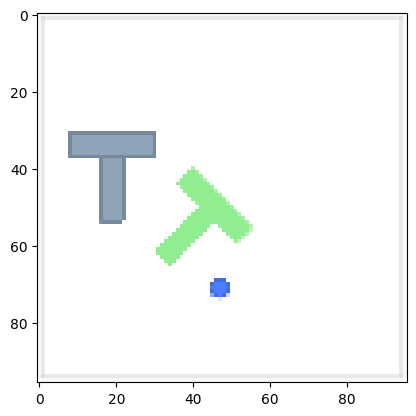

Action: [119.8492  472.12506]
Robot pos: [206.27466053 391.04141672]


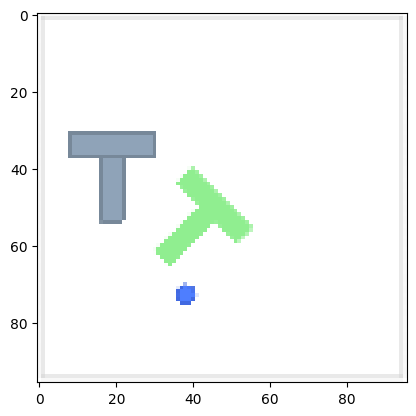

Action: [204.09216 366.9456 ]
Robot pos: [190.80911276 394.17550547]


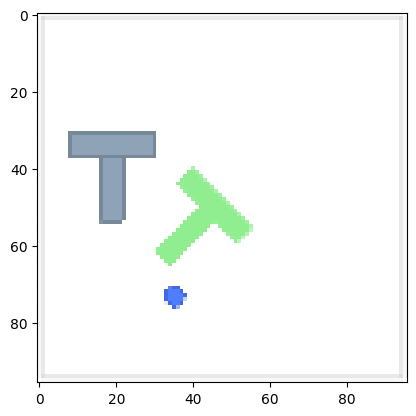

Action: [501.25037   8.97668]
Robot pos: [282.45052367 277.51739129]


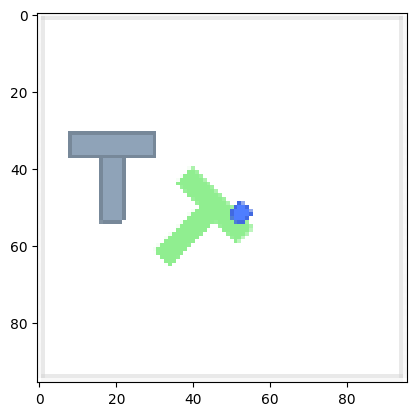

Action: [437.90442 337.07294]
Robot pos: [363.18087949 252.00630899]


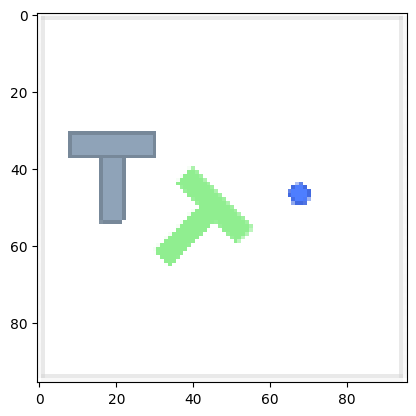

Action: [381.4588    73.618324]
Robot pos: [385.76649361 206.21412778]


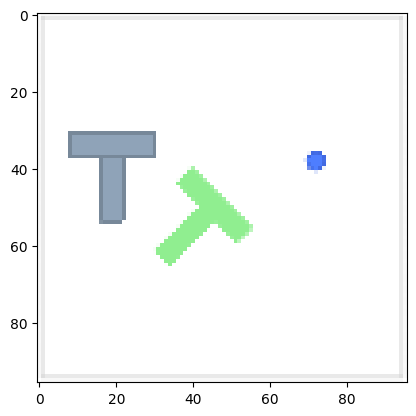

Action: [302.20163 244.66406]
Robot pos: [362.99307252 197.55961292]


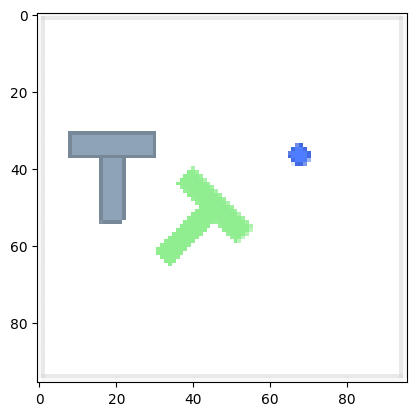

Action: [263.43405   20.408644]
Robot pos: [324.18524431 149.61824377]


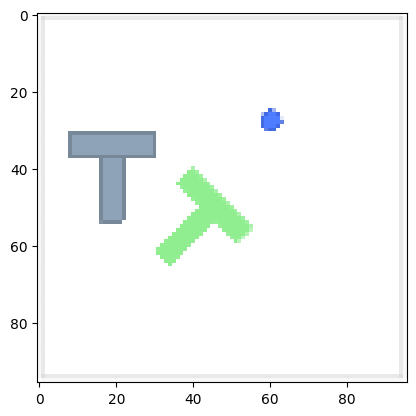

Action: [415.2326  291.90942]
Robot pos: [340.01724958 171.82166643]


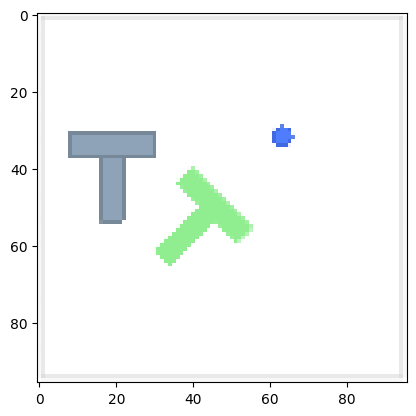

Action: [351.57977 262.80347]
Robot pos: [353.7049334 214.7876718]


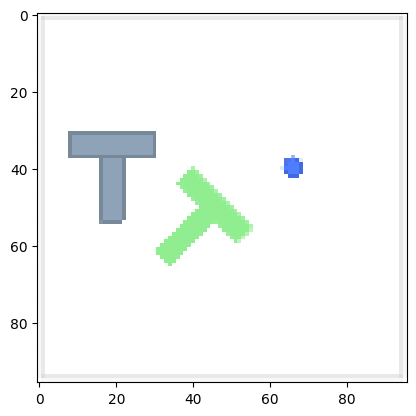

Action: [134.85747 286.6465 ]
Robot pos: [290.2255041  246.11801613]


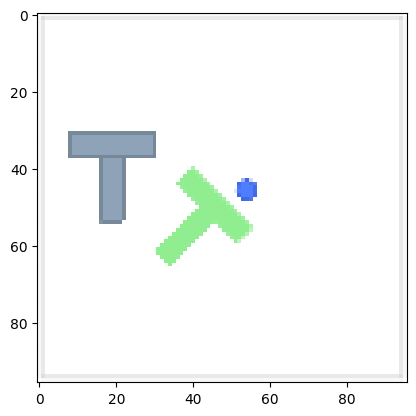

Action: [ 37.126556 322.96652 ]
Robot pos: [190.87469556 276.82129187]


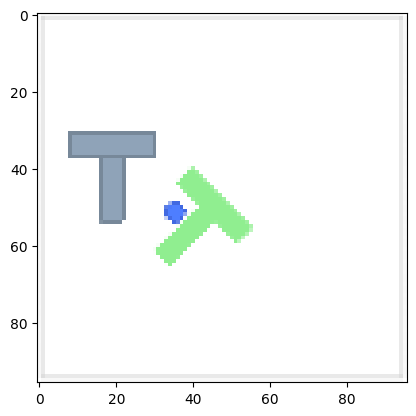

Action: [205.9255 104.1888]
Robot pos: [167.14109431 234.33263819]


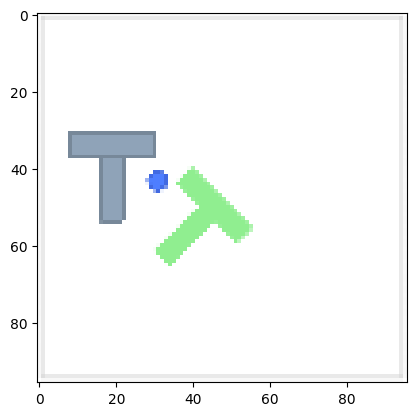

Action: [ 11.54747 126.04645]
Robot pos: [123.00664643 182.92644822]


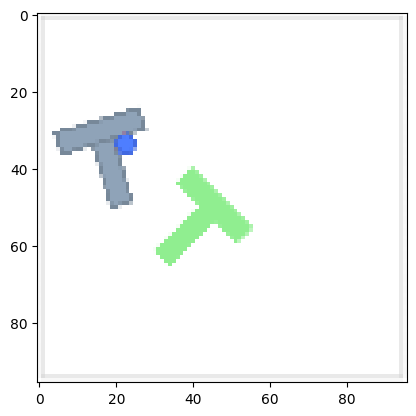

Action: [216.11337  80.76573]
Robot pos: [133.09862279 140.72056894]


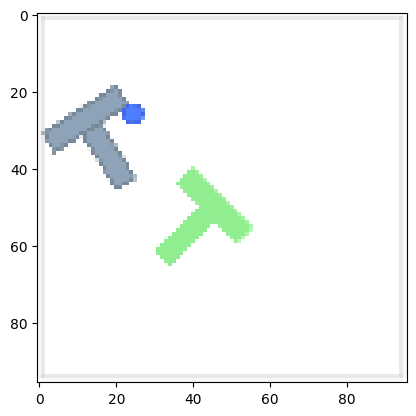

Action: [ 94.70547 384.33243]
Robot pos: [132.28804874 201.38745498]


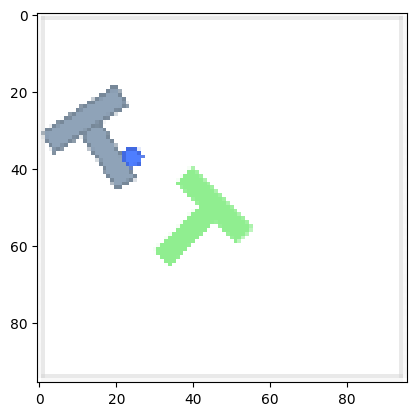

Action: [ 12.514663 197.79361 ]
Robot pos: [ 92.50575056 227.68119669]


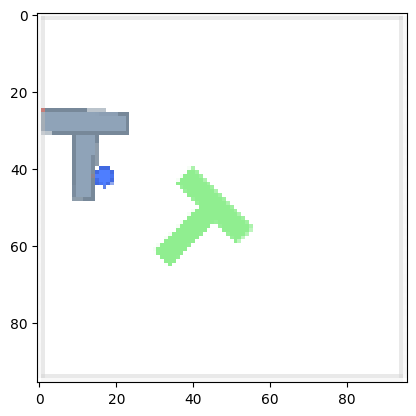

Action: [459.13242  109.335915]
Robot pos: [187.52221386 192.10811618]


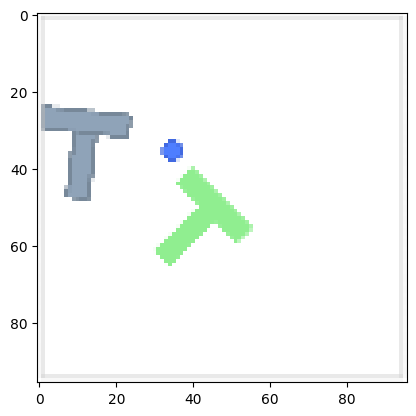

Action: [183.13472 468.72046]
Robot pos: [227.37087431 260.64500274]


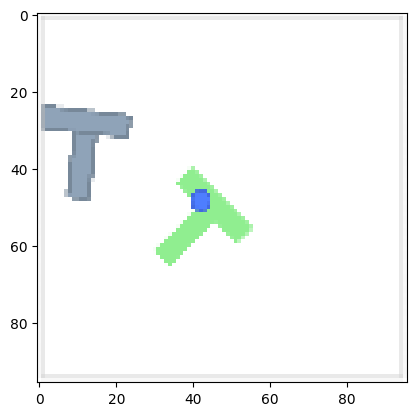

Action: [142.5814      3.5692396]
Robot pos: [201.54006713 215.69935636]


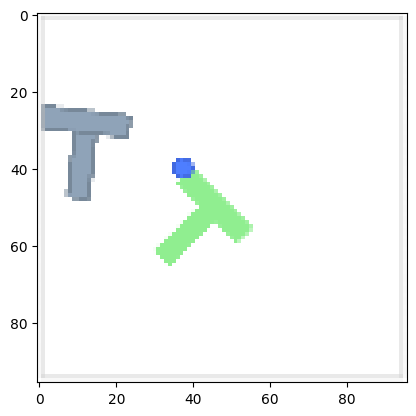

Action: [492.69992 507.70844]
Robot pos: [278.13730441 273.04495533]


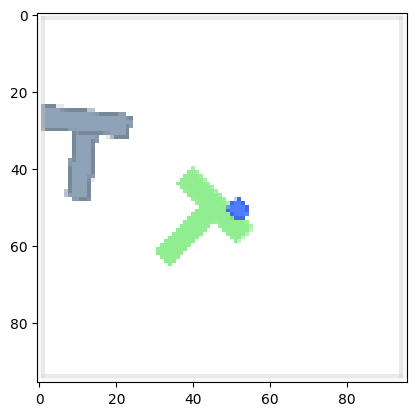

Action: [14.653721 70.41843 ]
Robot pos: [232.90157942 246.02583679]


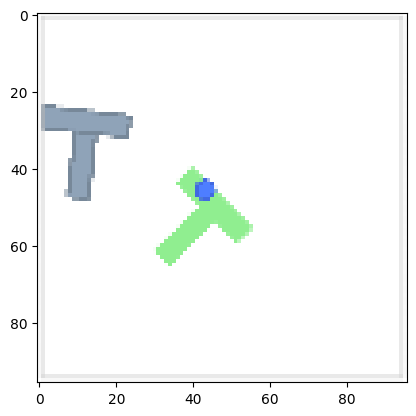

Action: [440.13718 273.55524]
Robot pos: [264.45393173 231.25800774]


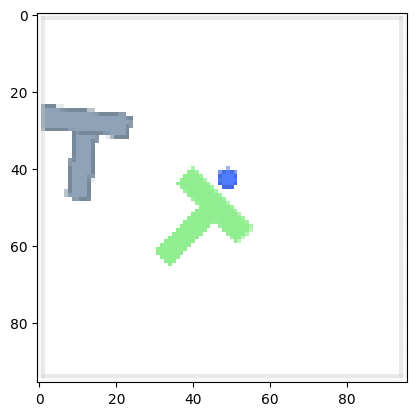

Action: [302.03708 425.98477]
Robot pos: [298.96909571 292.06631012]


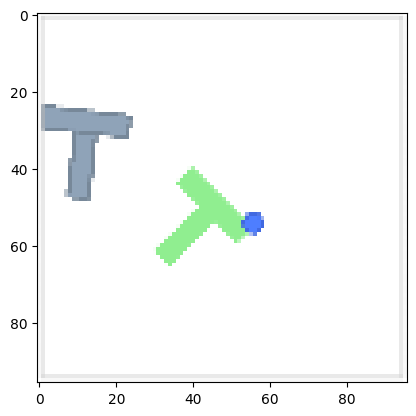

Action: [265.67264 506.71506]
Robot pos: [293.17983471 377.31799386]


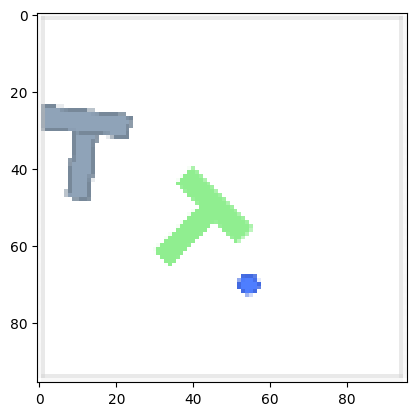

Action: [  6.296202 457.83423 ]
Robot pos: [204.60102252 425.01995901]


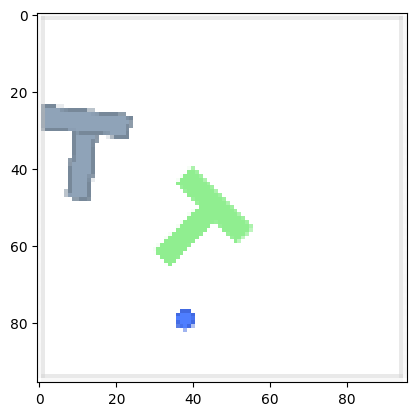

Action: [511.5517  443.02954]
Robot pos: [263.25442206 439.20525914]


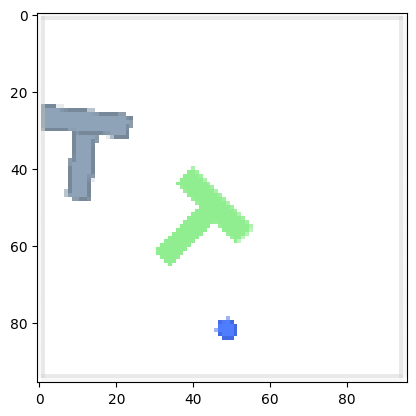

Action: [392.45282 383.40796]
Robot pos: [336.04024693 424.66639386]


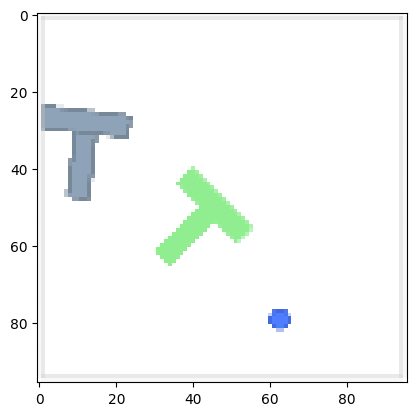

Action: [413.92065 116.16049]
Robot pos: [373.30949229 327.18837443]


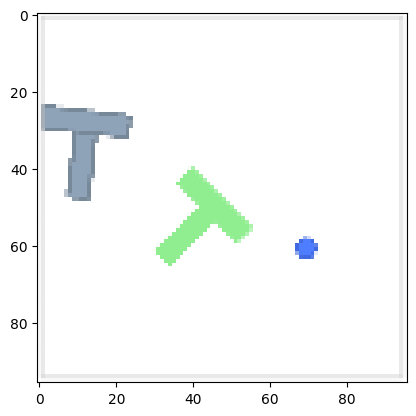

Action: [134.57657 208.34734]
Robot pos: [311.35134527 257.54213857]


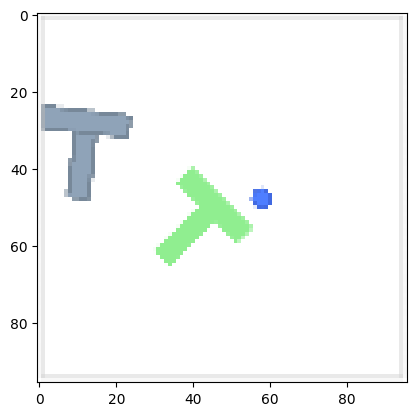

Action: [490.61597   14.680246]
Robot pos: [337.56279655 172.65192913]


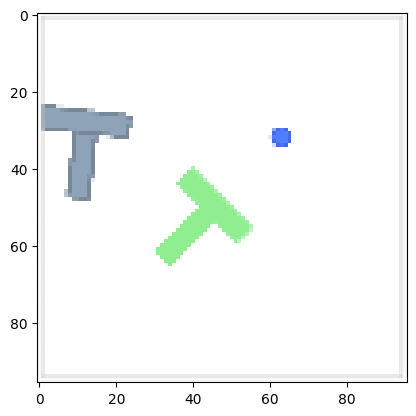

Action: [220.31897 132.1277 ]
Robot pos: [323.14835224 133.55787815]


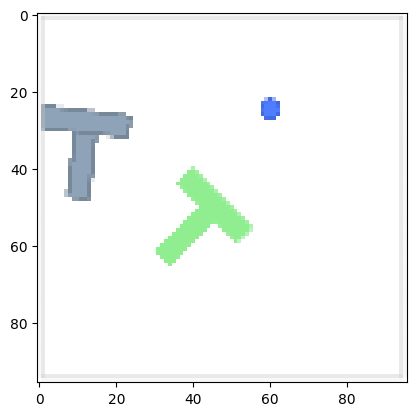

Action: [ 52.62884 344.76538]
Robot pos: [229.90063305 191.64535079]


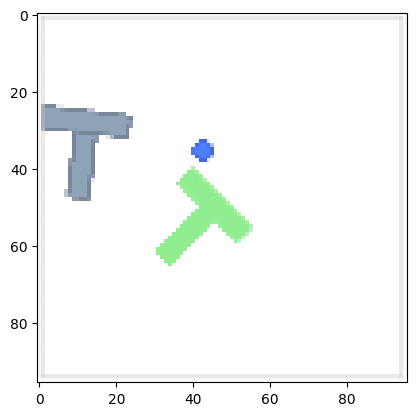

Action: [183.45512 258.44403]
Robot pos: [185.95965148 235.07736199]


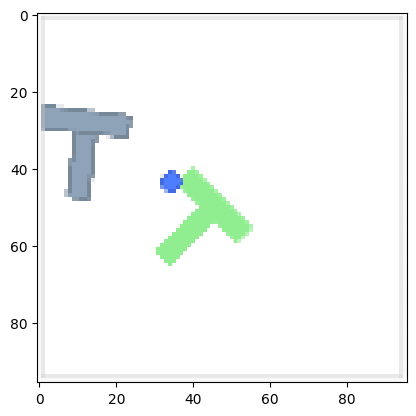

Action: [265.08237 282.38177]
Robot pos: [204.350547   256.38950205]


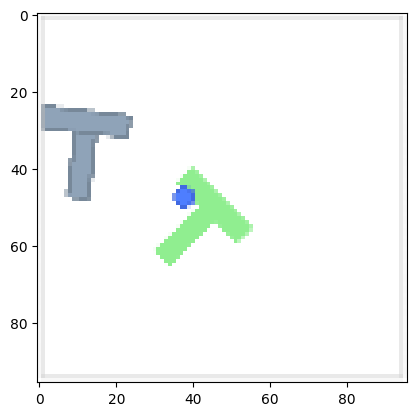

Action: [ 30.946774 284.6839  ]
Robot pos: [161.97361554 270.00493957]


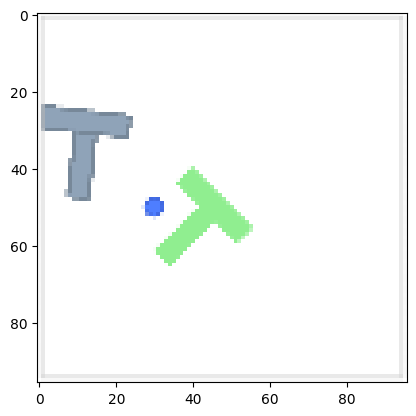

Action: [141.49438   23.440207]
Robot pos: [136.44086503 200.23697375]


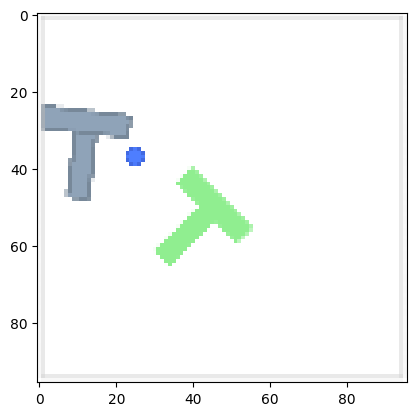

Action: [438.90094 225.45155]
Robot pos: [223.70394723 180.0590958 ]


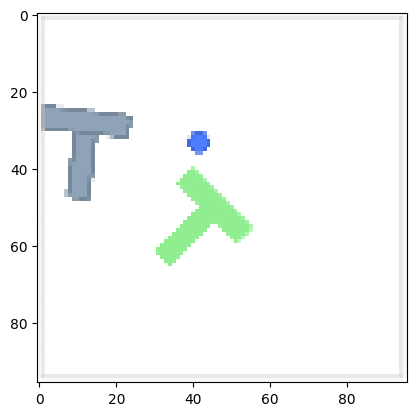

Action: [482.12598 486.18594]
Robot pos: [333.99849555 273.57698893]


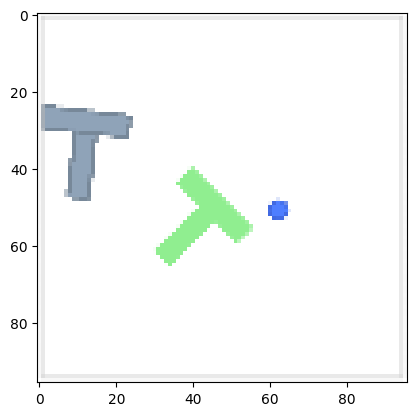

Action: [308.50275 488.42   ]
Robot pos: [355.17855647 371.36321412]


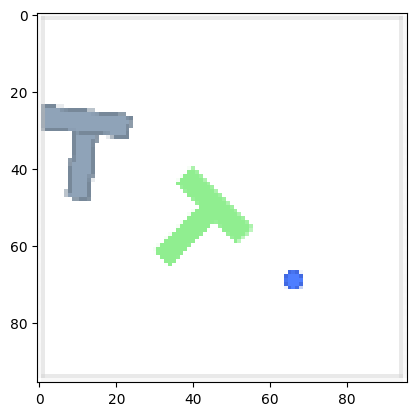

Action: [486.1439    99.605995]
Robot pos: [390.85789004 314.84786097]


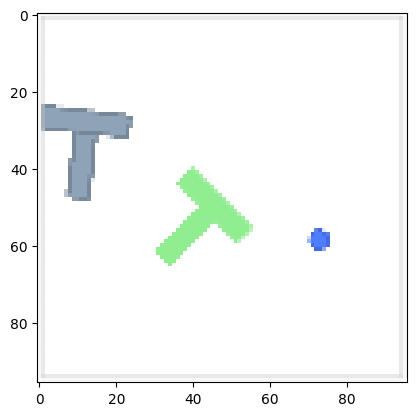

Action: [ 39.857033 295.20166 ]
Robot pos: [301.76348087 278.44898833]


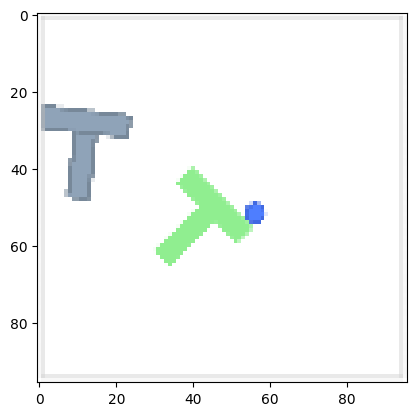

Action: [226.93422 367.90033]
Robot pos: [240.23405141 302.89750047]


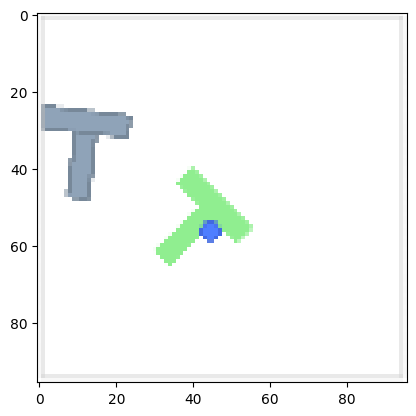

Action: [ 91.70785 180.6582 ]
Robot pos: [188.19716779 276.78547387]


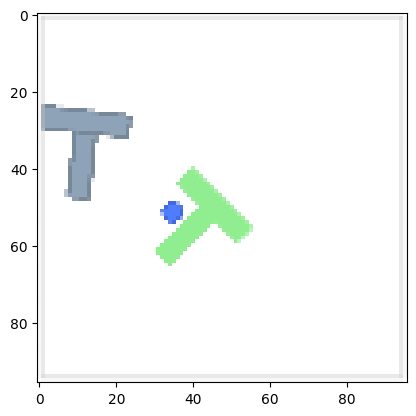

Action: [ 19.051514 192.96106 ]
Robot pos: [121.60546039 238.24575719]


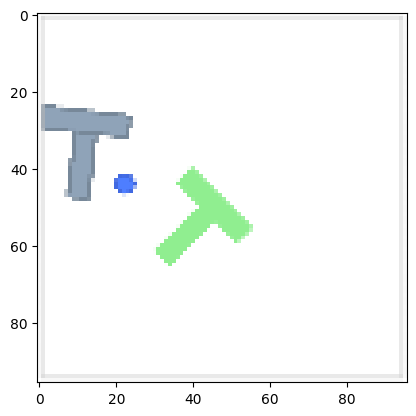

Action: [486.6715 275.7183]
Robot pos: [210.71134708 240.02803022]


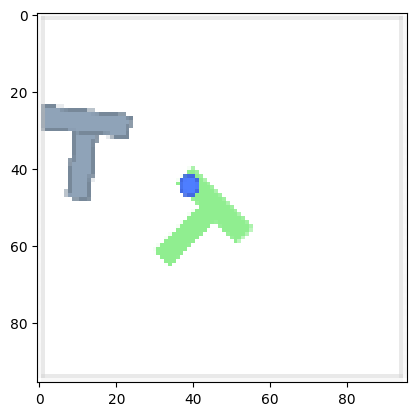

Action: [388.6935  188.91718]
Robot pos: [304.34250269 229.17342973]


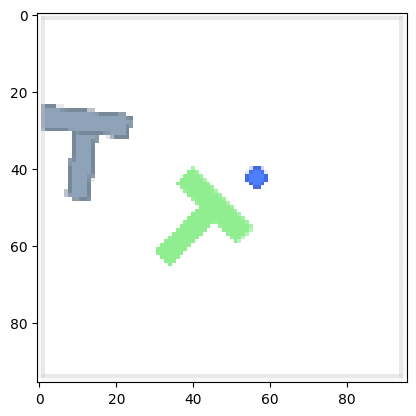

Action: [ 39.56242 378.07135]
Robot pos: [245.71788799 267.44658516]


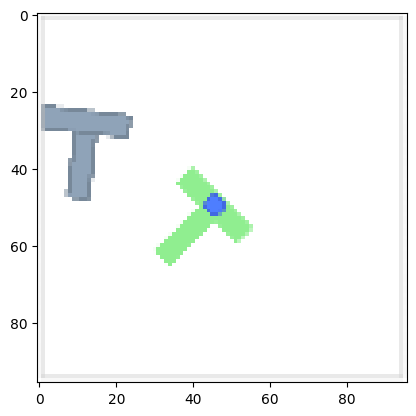

Action: [414.0749  147.08339]
Robot pos: [265.71495951 248.57122672]


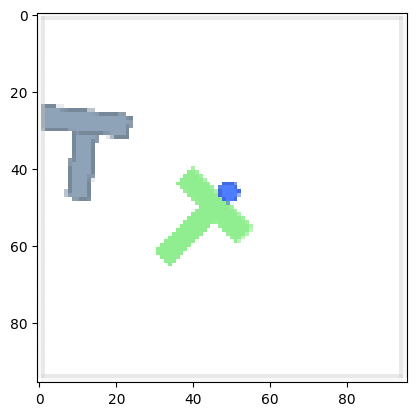

Action: [476.6098  182.80273]
Robot pos: [347.11991328 215.53645738]


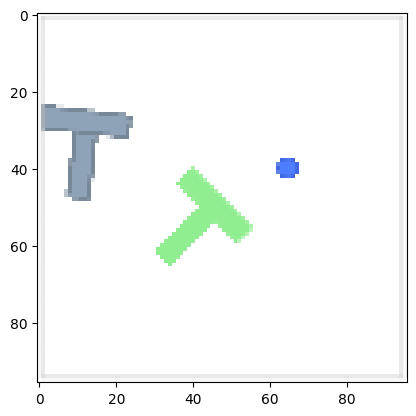

Action: [ 91.46186 447.32748]
Robot pos: [295.02216233 276.7942039 ]


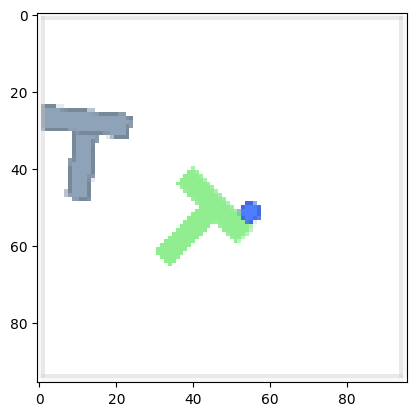

Action: [ 1.4358368 86.93188  ]
Robot pos: [179.43210009 246.66303332]


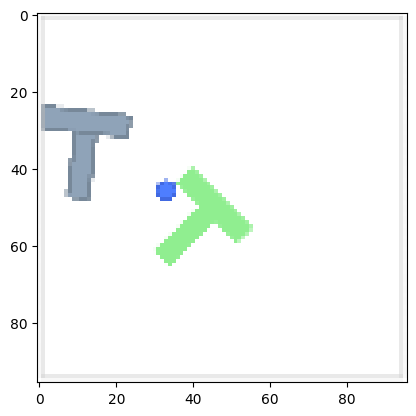

Action: [237.09666 175.07123]
Robot pos: [163.79200253 204.06243272]


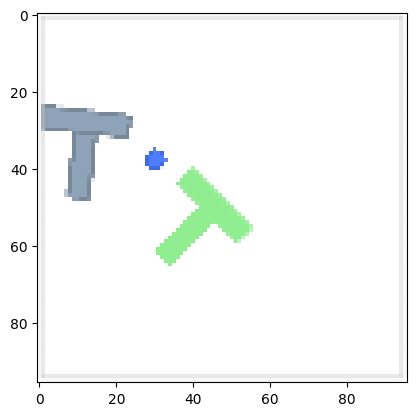

Action: [109.23009 146.41585]
Robot pos: [154.33158554 179.14089244]


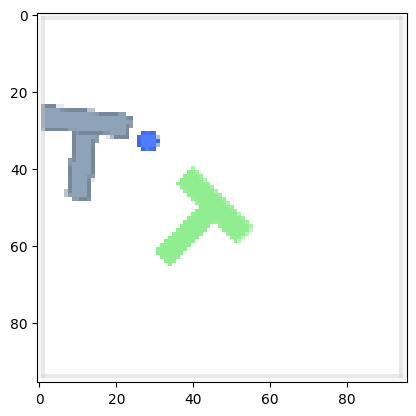

Action: [143.96124 465.1561 ]
Robot pos: [145.11130671 257.30333861]


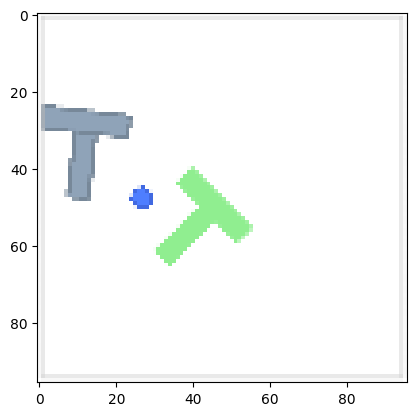

Action: [418.6887  377.65988]
Robot pos: [224.87937758 324.96194169]


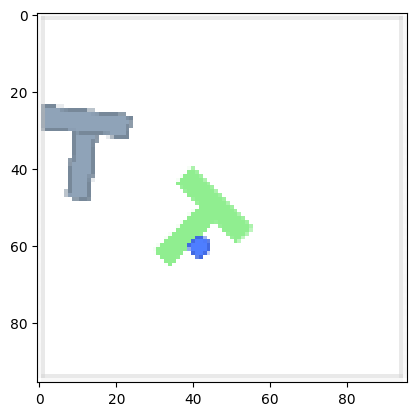

Action: [339.0566  208.56786]
Robot pos: [289.28341467 303.81597425]


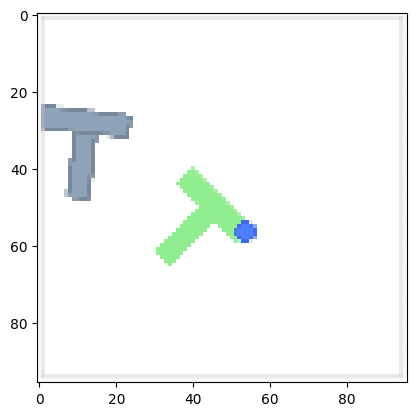

Action: [253.75734 324.16647]
Robot pos: [291.36517406 296.71122558]


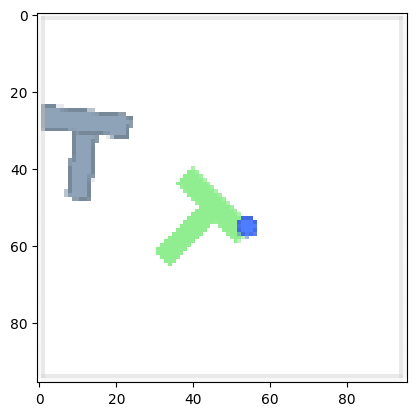

Action: [462.83295 496.88657]
Robot pos: [338.00235435 358.26244013]


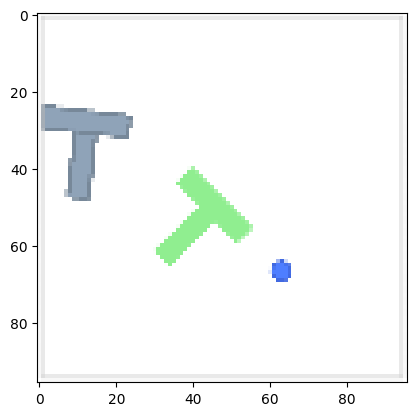

Action: [313.43448   85.360596]
Robot pos: [349.96747009 299.97503924]


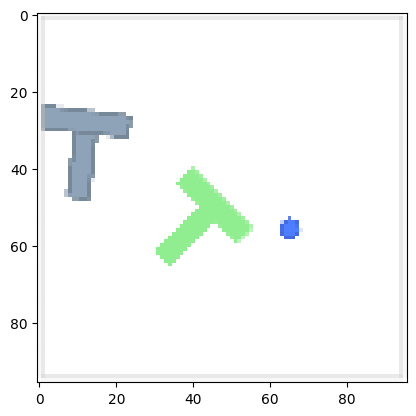

Action: [64.40649    3.9216957]
Robot pos: [262.65781224 181.73158092]


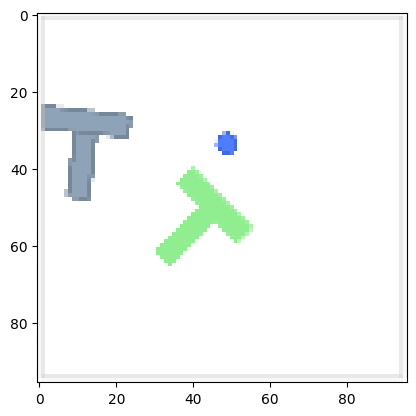

Action: [102.90206 129.03952]
Robot pos: [183.46165846 133.19847014]


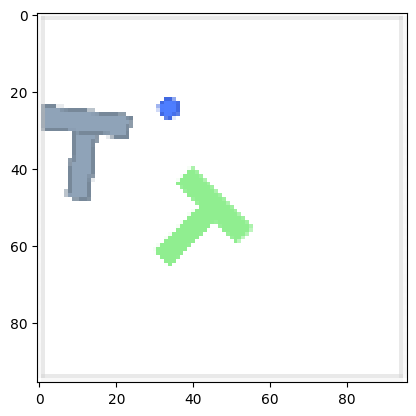

Action: [507.21225  91.32782]
Robot pos: [261.50407763 115.13348243]


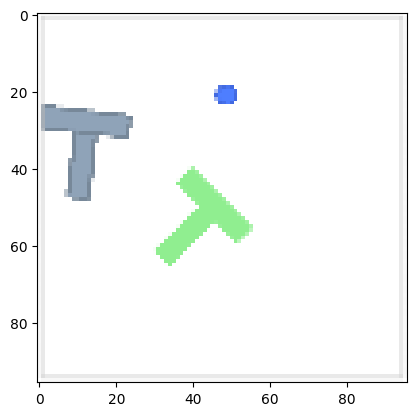

Action: [ 12.351065 298.26028 ]
Robot pos: [224.20897789 164.62710158]


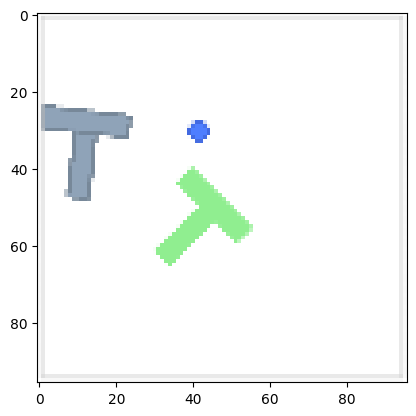

Action: [430.41965 407.41815]
Robot pos: [257.03889032 256.95226463]


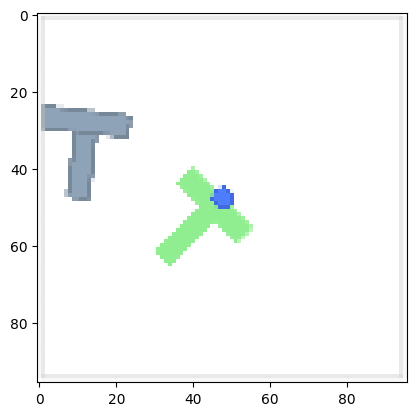

Action: [90.55535  20.974148]
Robot pos: [231.0921553  214.23558636]


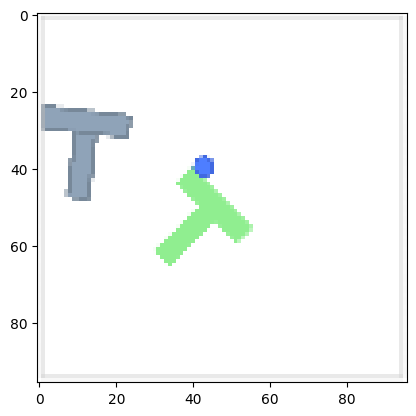

Action: [242.40219 272.96997]
Robot pos: [215.63933612 204.9974162 ]


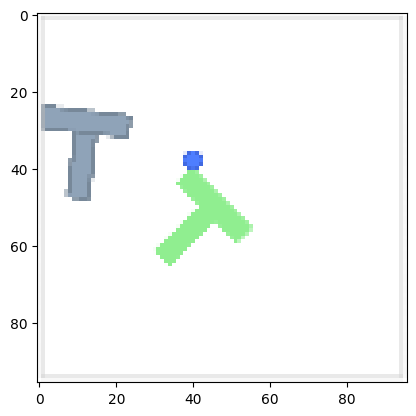

Action: [75.45353 72.46522]
Robot pos: [175.58011324 172.56331959]


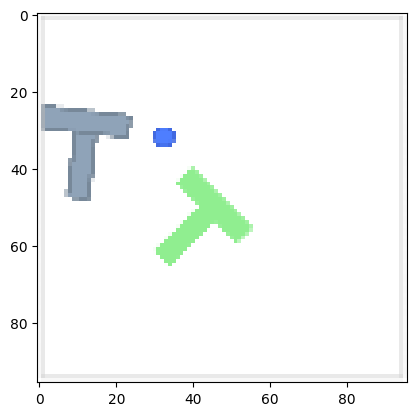

Action: [507.51837 104.2069 ]
Robot pos: [258.01649189 137.46584293]


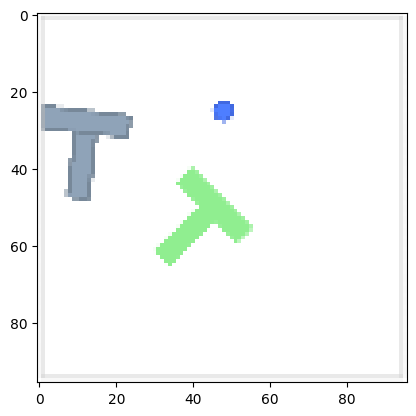

Action: [ 48.50518 489.7915 ]
Robot pos: [233.34632649 234.08096221]


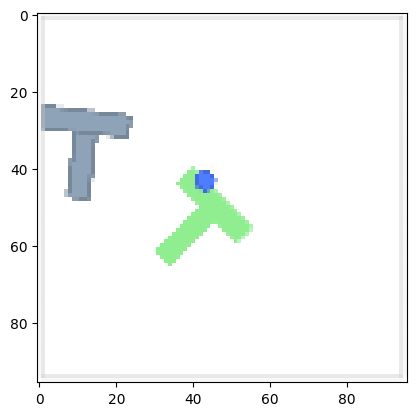

Action: [368.99985 192.07887]
Robot pos: [249.74799895 261.16830953]


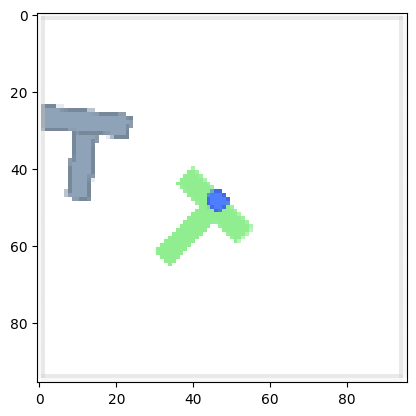

Action: [ 33.331753 388.94022 ]
Robot pos: [201.10688454 293.98422038]


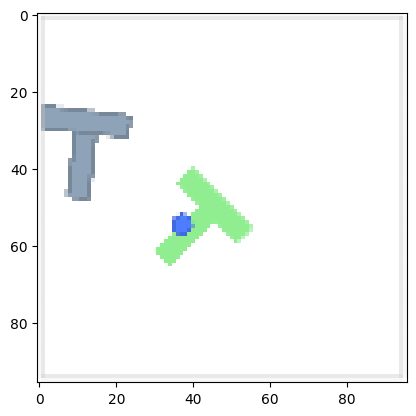

Action: [451.72803 506.1192 ]
Robot pos: [250.87164957 371.04813635]


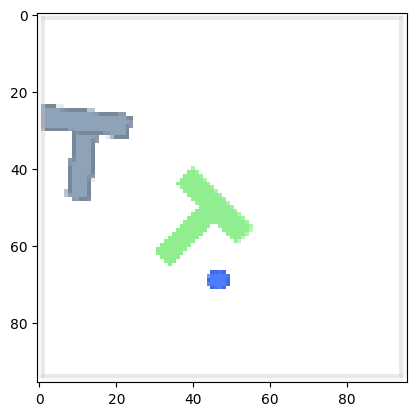

Action: [119.650406 437.33542 ]
Robot pos: [240.29954807 414.31026615]


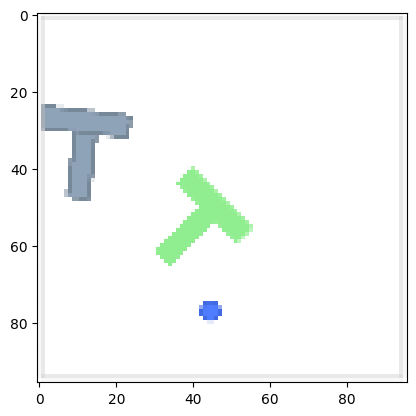

Action: [139.10818 414.0092 ]
Robot pos: [195.49980999 421.48965637]


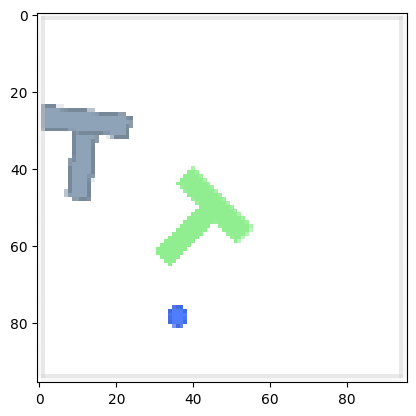

Action: [409.119   251.26613]
Robot pos: [247.42613732 371.07801911]


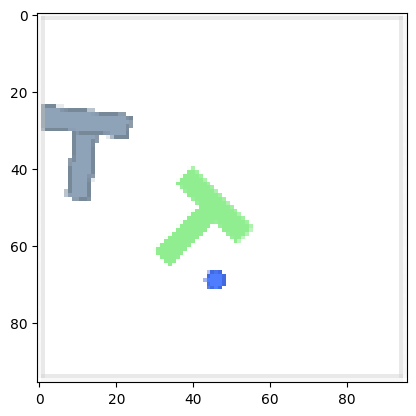

Action: [477.44516 192.48647]
Robot pos: [339.43292235 299.21087608]


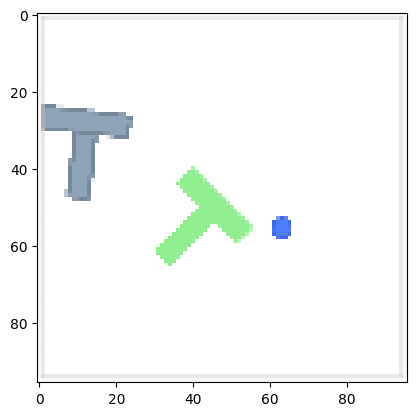

Action: [145.246   114.13375]
Robot pos: [307.61973536 224.61337612]


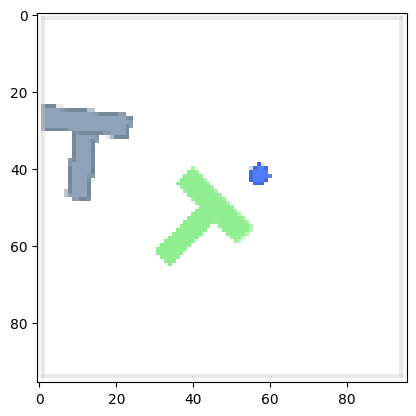

Action: [455.8703  345.40802]
Robot pos: [329.53865626 239.73254003]


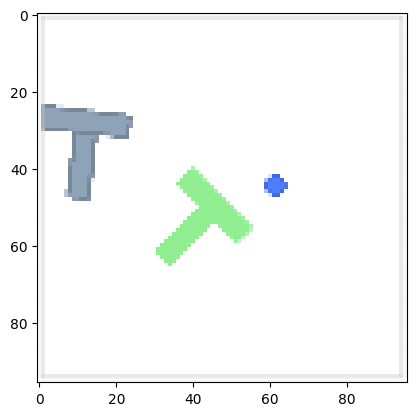

In [4]:
import gymnasium as gym
import gym_pusht
import matplotlib.pyplot as plt
import numpy as np

visualization_width=512
visualization_height=512
observation_width=96
observation_height=96

env = gym.make("gym_pusht/PushT-v0", obs_type="pixels_agent_pos",
               visualization_width=visualization_width,
               visualization_height=visualization_height,
               observation_width=observation_width,
               observation_height=observation_height
              )
observation, info = env.reset()
print("act space",env.action_space)

sx = observation_width / visualization_width
sy = observation_height / visualization_height

for _ in range(100):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    print("Action:",action)
    print("Robot pos:", observation['agent_pos'])
    plt.imshow(observation['pixels'])
    # plt.scatter(action[0]*sx, sy*action[1], color='red')
    # plt.scatter(observation['agent_pos'][0]*sx, sy*observation['agent_pos'][1], color='blue')
    plt.show()

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [5]:
from transformers import AutoModelForCausalLM
from PIL import Image

# https://github.com/vikhyat/moondream
# https://github.com/vikhyat/moondream/blob/main/notebooks/RepEng.ipynb
model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-01-09",
    trust_remote_code=True
).to(device)

{'answer': ' [\n  0,\n  0\n]'}


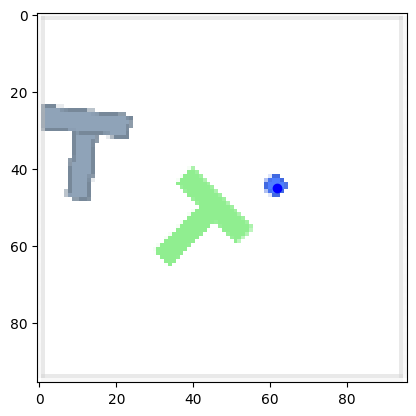

In [6]:
prompt = "Given an RGB image of shape (96, 96, 3), where the green T represents the goal state of the gray T block and the blue dot represents the robot's current position, determine the next [x, y] coordinates the robot should move toward. The goal is to push the gray T block to align with the position and orientation of the green T block. Return only a single [x, y] pair of values."
image = Image.fromarray(observation['pixels'])

encoded_image = model.encode_image(image)

action = model.query(encoded_image, prompt)
print(action)

plt.imshow(observation['pixels'])
# plt.scatter(action[0]*sx, sy*action[1], color='red')
plt.scatter(observation['agent_pos'][0]*sx, sy*observation['agent_pos'][1], color='blue')
plt.show()

In [7]:
model

HfMoondream(
  (model): MoondreamModel(
    (vision): ModuleDict(
      (patch_emb): Linear(in_features=588, out_features=1152, bias=True)
      (blocks): ModuleList(
        (0-26): 27 x ModuleDict(
          (ln1): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
          (attn): ModuleDict(
            (qkv): Linear(in_features=1152, out_features=3456, bias=True)
            (proj): Linear(in_features=1152, out_features=1152, bias=True)
          )
          (ln2): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
          (mlp): ModuleDict(
            (fc1): Linear(in_features=1152, out_features=4304, bias=True)
            (fc2): Linear(in_features=4304, out_features=1152, bias=True)
          )
        )
      )
      (post_ln): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
      (proj_mlp): ModuleDict(
        (fc1): Linear(in_features=2304, out_features=8192, bias=True)
        (fc2): Linear(in_features=8192, out_features=2048, bias=True)
      )
    )
  

## Finetuning?

Additional resources:


https://radekosmulski.com/diving-into-diffusion-policy-with-lerobot/

https://gist.github.com/radekosmulski/8ac6d2027d3b438d916748753051f044?ref=radekosmulski.com

https://github.com/huggingface/lerobot/blob/main/examples/3_train_policy.py?ref=radekosmulski.com

https://huggingface.co/datasets/lerobot/pusht?ref=radekosmulski.com

In [8]:
from datasets import load_dataset
from PIL import Image
import torchvision.transforms as T

dataset = load_dataset("lerobot/pusht", split="train")

# Resize and normalize
transform = T.Compose([
    T.Resize((96, 96)),
    T.ToTensor(),
])

def preprocess(example):
    print(example)
    frames = example['observation']['image']  # shape (episode_len, H, W, C)
    positions = example['observation']['agent_pos']  # shape (episode_len, 2)
    
    examples = []
    for i in range(len(frames) - 1):
        current_img = Image.fromarray(frames[i])
        img_tensor = transform(current_img)
        current_pos = positions[i]
        next_pos = positions[i+1]
        
        prompt = f"Robot at position {current_pos}. Where should it move next to push the T block to the goal?"
        target = f"{next_pos}"
        examples.append({
            "image": current_img,
            "prompt": prompt,
            "target": target
        })
    return examples

processed_dataset = dataset.map(preprocess, batched=False)


Resolving data files:   0%|          | 0/206 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/206 [00:00<?, ?it/s]

Map:   0%|          | 0/25650 [00:00<?, ? examples/s]

{'observation.state': [222.0, 97.0], 'action': [233.0, 71.0], 'episode_index': 0, 'frame_index': 0, 'timestamp': 0.0, 'next.reward': 0.19029748439788818, 'next.done': False, 'next.success': False, 'index': 0, 'task_index': 0}


KeyError: 'observation'

In [ ]:
dataset

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vikhyatk/moondream2", trust_remote_code=True)

def tokenize_example(example):
    image_embedding = model.encode_image(example["image"])
    prompt = example["prompt"]
    target = example["target"]
    full_prompt = f"{prompt}\nAnswer: {target}"
    
    tokenized = tokenizer(full_prompt, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    tokenized["labels"] = tokenized["input_ids"].clone()
    
    return tokenized

tokenized_dataset = processed_dataset.map(tokenize_example)


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./moondream2-pusht-finetuned",
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    logging_steps=50,
    learning_rate=5e-5,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=None,
    tokenizer=tokenizer,
)

trainer.train()


## Starting from https://medium.com/correll-lab/robotic-behavior-cloning-i-auto-regressive-transformers-a7be623f4291 and https://colab.research.google.com/drive/18GIHeOQ5DyjMN8iIRZL2EKZ0745NLIpg?usp=sharing

In [1]:
import os # to deal with files
import gdown # to download from google drive
import zipfile # to unzip

# download demonstration data from Google Drive
dataset_path = "pusht_cchi_v7_replay.zarr.zip"
extracted_dataset_path = "pusht_cchi_v7_replay.zarr"  # Path to extracted dataset

if not os.path.isfile(dataset_path):
    id = "1KY1InLurpMvJDRb14L9NlXT_fEsCvVUq&confirm=t"
    gdown.download(id=id, output=dataset_path, quiet=False)

# Extract the dataset if it hasn't been extracted yet
if not os.path.isdir(extracted_dataset_path):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dataset_path)

In [2]:
import zarr # to load the dataset
import numpy as np
import torch

def create_sample_indices(
        episode_ends:np.ndarray, sequence_length:int,
        pad_before: int=0, pad_after: int=0):
    indices = list()
    for i in range(len(episode_ends)):
        start_idx = 0
        if i > 0:
            start_idx = episode_ends[i-1]
        end_idx = episode_ends[i]
        episode_length = end_idx - start_idx

        min_start = -pad_before
        max_start = episode_length - sequence_length + pad_after

        # range stops one idx before end
        for idx in range(min_start, max_start+1):
            buffer_start_idx = max(idx, 0) + start_idx
            buffer_end_idx = min(idx+sequence_length, episode_length) + start_idx
            start_offset = buffer_start_idx - (idx+start_idx)
            end_offset = (idx+sequence_length+start_idx) - buffer_end_idx
            sample_start_idx = 0 + start_offset
            sample_end_idx = sequence_length - end_offset
            indices.append([
                buffer_start_idx, buffer_end_idx,
                sample_start_idx, sample_end_idx])
    indices = np.array(indices)
    return indices


def sample_sequence(train_data, sequence_length,
                    buffer_start_idx, buffer_end_idx,
                    sample_start_idx, sample_end_idx):
    result = dict()
    for key, input_arr in train_data.items():
        sample = input_arr[buffer_start_idx:buffer_end_idx]
        data = sample
        if (sample_start_idx > 0) or (sample_end_idx < sequence_length):
            data = np.zeros(
                shape=(sequence_length,) + input_arr.shape[1:],
                dtype=input_arr.dtype)
            if sample_start_idx > 0:
                data[:sample_start_idx] = sample[0]
            if sample_end_idx < sequence_length:
                data[sample_end_idx:] = sample[-1]
            data[sample_start_idx:sample_end_idx] = sample
        result[key] = data
    return result

# normalize data
def get_data_stats(data):
    data = data.reshape(-1,data.shape[-1])
    stats = {
        'min': np.min(data, axis=0),
        'max': np.max(data, axis=0)
    }
    return stats

def normalize_data(data, stats):
    # nomalize to [0,1]
    ndata = (data - stats['min']) / (stats['max'] - stats['min'])
    # normalize to [-1, 1]
    ndata = ndata * 2 - 1
    return ndata

def unnormalize_data(ndata, stats):
    ndata = (ndata + 1) / 2
    data = ndata * (stats['max'] - stats['min']) + stats['min']
    return data

# dataset
class PushTStateDataset(torch.utils.data.Dataset):
    def __init__(self, dataset_path,
                 pred_horizon, obs_horizon, action_horizon):

        # read from zarr dataset
        dataset_root = zarr.open(dataset_path, mode='r')
        # All demonstration episodes are concatinated in the first dimension N
        train_data = {
            # (N, action_dim)
            'action': dataset_root['data']['action'][:],
            # 'action': np.array(dataset_root['data']['action']),
            # (N, obs_dim)
            'obs': dataset_root['data']['state'][:]
            # 'obs': np.array(dataset_root['data']['state'])

        }
        # Marks one-past the last index for each episode
        episode_ends = dataset_root['meta']['episode_ends'][:]

        # compute start and end of each state-action sequence
        # also handles padding
        indices = create_sample_indices(
            episode_ends=episode_ends,
            sequence_length=pred_horizon,
            # add padding such that each timestep in the dataset are seen
            pad_before=obs_horizon-1,
            pad_after=action_horizon-1)

        # compute statistics and normalized data to [-1,1]
        stats = dict()
        normalized_train_data = dict()
        for key, data in train_data.items():
            stats[key] = get_data_stats(data)
            normalized_train_data[key] = normalize_data(data, stats[key])

        self.indices = indices
        self.stats = stats
        self.normalized_train_data = normalized_train_data
        self.pred_horizon = pred_horizon
        self.action_horizon = action_horizon
        self.obs_horizon = obs_horizon

    def __len__(self):
        # all possible segments of the dataset
        return len(self.indices)

    def __getitem__(self, idx):
        # get the start/end indices for this datapoint
        buffer_start_idx, buffer_end_idx, \
            sample_start_idx, sample_end_idx = self.indices[idx]

        # get nomralized data using these indices
        nsample = sample_sequence(
            train_data=self.normalized_train_data,
            sequence_length=self.pred_horizon,
            buffer_start_idx=buffer_start_idx,
            buffer_end_idx=buffer_end_idx,
            sample_start_idx=sample_start_idx,
            sample_end_idx=sample_end_idx
        )

        # discard unused observations
        nsample['obs'] = nsample['obs'][:self.obs_horizon,:]
        return nsample

In [3]:
from torch.utils.data import random_split

# parameters
pred_horizon = 16
obs_horizon = 2
action_horizon = 8
#|o|o|                             observations: 2
#| |a|a|a|a|a|a|a|a|               actions executed: 8
#|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p| actions predicted: 16

# create dataset from file
dataset = PushTStateDataset(
    dataset_path=extracted_dataset_path,
    pred_horizon=pred_horizon,
    obs_horizon=obs_horizon,
    action_horizon=action_horizon
)
# save training data statistics (min, max) for each dim
stats = dataset.stats

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size  # Ensure all samples are used

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# create dataloaders
dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    num_workers=1,
    shuffle=True, # set this to False to visualize the dataset
    # accelerate cpu-gpu transfer
    pin_memory=True,
    # don't kill worker process after each epoch
    persistent_workers=True
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=64,
    num_workers=1,
    shuffle=False, # set this to False to visualize the dataset
    # accelerate cpu-gpu transfer
    pin_memory=True,
    # don't kill worker process after each epoch
    persistent_workers=True
)


# visualize data in batch
batch = next(iter(val_dataloader))
print("batch['obs'].shape:", batch['obs'].shape)
print("batch['action'].shape", batch['action'].shape)

In [ ]:
from matplotlib import pyplot as plt

def plot_tee(ax,position, angle, scale=30, color='lightslategray'):
    length = 4

    vertices1 = np.array([[-length * scale / 2, -scale],
                          [ length * scale / 2, -scale],
                          [ length * scale / 2, 0],
                          [-length * scale / 2, 0]])

    vertices2 = np.array([[-scale / 2, -scale],
                          [-scale / 2, -length * scale],
                          [ scale / 2, -length * scale],
                          [ scale / 2, -scale]])

    theta=angle
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta),  np.cos(theta)]])

    # Rotate and translate
    vertices1 = (vertices1 @ rotation_matrix.T) + position
    vertices2 = (vertices2 @ rotation_matrix.T) + position

    # Plot the T-shape
    ax.fill(*zip(*vertices1), color=color, alpha=0.6, edgecolor='black', linewidth=2)
    ax.fill(*zip(*vertices2), color=color, alpha=0.6, edgecolor='black', linewidth=2)

In [ ]:
import matplotlib.pyplot as plt

B=54

# Assuming batch["action"][0] is a list of lists, where each inner list represents [x, y] coordinates
x_coords = [point[0] for point in batch["action"][B]]
y_coords = [point[1] for point in batch["action"][B]]


fig, ax = plt.subplots()
plt.plot(x_coords, y_coords, marker='*', linestyle='-') # actions
for i in range(batch["obs"].size(1)):
  plot_tee(ax,position=(batch["obs"][B][i][2], batch["obs"][B][i][3]), angle=batch["obs"][B][i][4]*np.pi)
  plt.plot(batch["obs"][B][i][0],batch["obs"][B][i][1],'r+') # agent_x / agent_y
  plt.plot(batch["obs"][B][i][2],batch["obs"][B][i][3],'b*') # 0/0 of Tee

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Action Sequence")
plt.grid(True)
plt.xlim(-1, 1)  # Adjust limits as needed
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box') #Equal aspect ratio
plt.show()